## Conditional Probability

suppose:

$$P(B) \ne 0$$

we have:
$$P(A \vert B) = \frac{P(A\cap B)}{P(B)}$$

### Multiplication rule
$$P(A\cap B) = P(B\vert A)P(A) = P(A\vert B)P(B)$$

### Total probability theorem
$$P(B) = P(B\vert A)P(A) + P(B\vert \bar{A})P(\bar{A})$$

### Bayes's rule

$$P(A_i\vert B) = \frac{P(A_i\cap B)}{P(B)} = \frac{P(B\vert A_i)P(A_i)}{\Sigma_j P(B\vert A_j)P(A_j)}$$


## Independancy

A and B are infependent if:

$$P(B\vert A) = P(B)$$
This is not very good if $P(A)=0$.

To solve it, we apply conditional prob.

$$P(B\cap A) = P(B)P(A)$$

indenpendent and pairwise independent
Toss a fair coin twice:

A: first toss is H

B: second toss is H

C: two tosses have same result.

$$P(A\cap B)=\frac{1}{4}=P(A)P(B)$$
$$P(A\cap C)=\frac{1}{4}=P(A)P(C)$$
$$P(B\cap C)=\frac{1}{4}=P(B)P(C)$$
But:
$$P(A\cap B\cap C) = \frac{1}{4} \ne P(A)P(B)P(B)=\frac{1}{8}$$
So, A, B and C are pairwise independent, but not mutually independent.

The fact here is, giving information about event A will not effect our estimation of probability of B, the number need to be designed to fullfill requirement $P(A\cap B)=P(A)P(B)$, in this example, if we know first toss is H, we still cannot make any bias estimation about either B or C, but is we know A and B happened, then estimation of C will change to $P(C\vert A\cap B)=1$.

## Counting

### Permulation
### Combination
$$C^k_n = \frac{n!}{k!(n-k)!}$$

proof:

To choose k items from n and construct a permutation

approach 1: choose 1 item from remaining items every time, we have $n(n-1)(n-2)...(n-k+1)=\frac{n!}{(n-k)!}$ count.

approach 2: choose k from n first, then do permutation, we have: $k!C^k_n$

these 2 approaches will give the same count, so:
$$C^k_n = \frac{n!}{k!(n-k)!}$$

## Random variable
### expectation property

If X is a random variable, Y = g(X)
$$E[Y] = \Sigma_y yp_Y(y)$$
$$E[Y] = \Sigma_x g(x)P_X(x)$$

if g(x) is a linear function, then:

$$E[g(X)] = g(E[X])$$
otherwise, this is not true.

### Variance
$$E[(X-E[X])^2] = \Sigma_x(x-E[X])^2p_X(x)$$
$$=E[X^2]-2E[X]E[X]+E^2[X]$$
$$=E[X^2]-(E[X])^2$$

### With condition

$$p_{X\vert A} = P(X=x\vert A)$$
$$E[X\vert A] = \Sigma_xxp_{X\vert A}(x)$$
$$E[Y\vert A] = \Sigma_xg(x)p_{X\vert A}(x)$$

### Geometric Probability mess function
Suppose we have coin flip, we get k-1 tails until a head has probability: $p_X(k)=(1-p)^{k-1}p$, then, we have:
$$P(X-n \vert X>n) = P(X)$$
This means the previous tails will not effect following toss, it's memoryless. 
Explaination: if we plot this probability mess function, it is:

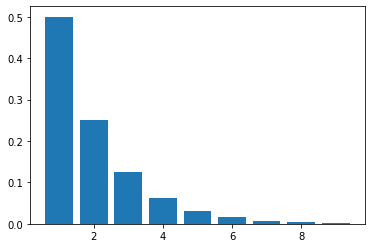

In [56]:
import matplotlib.pyplot as plt
import math

k = list(range(1, 10))
y = [0.5*0.5**(x-1) for x in k]
a = plt.bar(k, y)

If we have already known that 1 and 2 did not happen, then we need redistribute probabilty of remaining events to make sum of probability is 1. Because the remaining events has the same shape as the orignal events, so the probability of 3 will be the same as event 1 if we know the condition that 1 and 2 has happened.

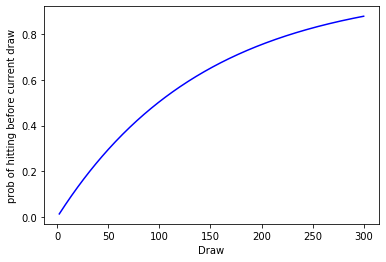

Prob of getting nothing after 300 draws: 0.1224123682576389
Expectation: 125.4850740457376
Std: 97.22966935545593


In [49]:
"""PCR draw 3 stars character with safety mechanism"""

import matplotlib.pyplot as plt
import math

th = 300

k = list(range(2, th+1))
y = [(1-0.993**(x)) for x in k]
plt.xlabel("Draw")
plt.ylabel("prob of hitting before current draw")
plt.plot(k, y, 'b')
plt.show()
print("Prob of getting nothing after {} draws:".format(th), 1-(1-0.993**(th-1)))
y = [x*0.007*0.993**(x-1) for x in k]
exp = sum(y)+th*0.993**th
print("Expectation:",exp)
sigma = [(x-exp)**2*0.007*0.993**(x-1) for x in k]
sigma.append((th-exp)**2*0.993**th)
sigma = math.sqrt(sum(sigma))
print("Std:",sigma)

But how about calculating expectation when there is no safety?

### devide and conquer

from total probabilty theorem, we have:

$$P(B) = \Sigma_iP(B\vert A_i)P(A_i)$$

We can apply PMF to it, then we get:

$$p_X(x) = \Sigma_iP(A_i)p_{X\vert A_i}(x)$$
$$E[X] = \Sigma_xxp_X(x) = \Sigma_xx\Sigma_iP(A_i)p_{X\vert A_i}(x) = \Sigma_iP(A_i)\Sigma_xxp_{X\vert A_i}(x)=\Sigma_iP(A_i)E[x\vert A_i]$$

Go back to PCR problem, expectation of number of draw to get an charater is:
$$E[X]=P(X=1)E[X\vert X=1] + P(X>1)E[X\vert X>1]$$
Because:
$$E[X\vert X>1] = E[X-1\vert X-1>0]+E[1\vert x-1>0] = E[X] + 1$$
so:
$$E[X]=p * 1 + (1 - p) * (E[X] + 1)$$
$$E[X] = \frac{1}{p}$$

To understand the "because", just think it as someone draw and get nothing, so he wastes 1 chance, and because of memoryless, the expectation under "wasted" condition will be the same as first draw.

## Joint PMF

$$\Sigma_x\Sigma_yp_{X,Y}(x, y)=1$$

$$p_X(x)=\Sigma_yp_{X,Y}(x, y)$$

$$p_{X\vert Y}(x\vert y)=P(X=x\vert Y=y)=\frac{p_{X,Y}(x, y)}{p_Y(y)}$$

$$\Sigma_xp_{X\vert Y}(x\vert y) =1$$

## Multiple Discrete Random Varibles

Expectation Properties:
$$E[g(x, y)] = \Sigma_x\Sigma_yg(x,y)p_{X,Y}(x, y)$$
normally, $$E[g(x, y)] \ne g(E[X], E[Y])$$
unless:
$$E[\alpha X+\beta] = \alpha E[X]+\beta$$
$$E[X+Y+Z] = E[X]+E[Y]+E[Z]$$

If X, Y are independent:
$$E[XY]=E[X]E[Y]$$

$$E[g(X)h(Y)]=E[g(X)]E[h(Y)]$$

Variance Properties:
$$Var(\alpha X) = \alpha^2Var(X)$$

$$Var(X+\alpha) = Var(X)$$

Let Z = X+Y
if X, Y are independent:
$$Var(X+Y)=Var(X)+Var(Y)$$

Some cases:

If X=Y, $Var(X+Y)=Var(2X)=4Var(X)$

If X=-Y, $Var(X+Y)=Var(0) = 0$

If X, Y are independent, Z = X-3Y, then $Var(Z) = Var(X)+9Var(Y)$

## Interesting problem and methodology

### 1.Binomial mean and variance
X is number of head in n times coin flip. What is the expectation of X and the variance.

$$E[X]=\Sigma_{k=0}^{n}k\ C_n^kp^k(1-p)^{n-k}$$

This formula is very hard to calculate, let use a smart methodology.

Make $X_i$ as an event representing ith toss, we have to result: head=1 and tail=0

Then, our X will be $\Sigma_i^nX_i$

Because X is a memoryless event and the probability of head is p, then:

$$E[X_i] = p * 1 + (1-p)*0 = p$$

$$Var(X_i) = E[X_i^2]-E^2[X_i] = p-p^2$$
So:

$$E[X] = E[\Sigma_i^nX_i] = \Sigma_i^nE[X_i]=np$$
$$Var(X) = Var(\Sigma_i^nX_i) = \Sigma_i^nVar(X_i)=np(1-p)$$

This result tells us, if our coin is a fair coin, the variance of the result will reach the maximum value.

### 2. Hat problem
N people have different hats from each other, they throw their hats into a box and randomly pick one, X is the number of people who finally get their own hat, what is the expectation of X and how about the variance.

We Can use the same methodology to solve this problem.

We define $X_i$ as the ith people who picks hat, own hat=1, other's hat=0. the possibility of get own hat is $\frac{1}{n}$.
why? Because he can pick his own hat only if prior i-1 people didn't pick his hat and he pick it, which has probability:

$$p = \frac{n-1}{n}\frac{n-2}{n-1}...\frac{n-i-1}{n-i}\frac{1}{n-i-1}=\frac{1}{n}$$

So, we have:

$$E[X_i] = \frac{1}{n}*1+\frac{n-1}{n}*0=\frac{1}{n}$$
$$Var(X_i) = E[X_i^2]-E^2[X_i]=\frac{1}{n}-\frac{1}{n^2}$$

So, for $X$, we have:

$$E[X] = 1$$

But since $X_i$ is not independent with each other, we cannot simple add their variance.

$$Var(X) = E[X^2]-E^2[X] = E[X^2]-1$$

$$E[X^2] = E[(\Sigma_i^n X_i)^2] = \Sigma_i^nE[X_i^2]+\Sigma_{i\ne j}E[X_iX_j]$$

$X_iX_j$ means i and j both get their hats, the probability of it is:

$$p=\frac{1}{n}\frac{1}{n-1}$$

So:

$$E[X^2] = n\frac{1}{n}+(n^2-n)(\frac{1}{n^2-n}) = 2$$

So:

$$Var(X) = 2 - 1 = 1$$